# NHANES Data Exploration & Cleaning

This notebook includes:
- Data cleaning
- Missing data handling
- Summary statistics (mean, median, SD, quartiles, skewness)
- Categorical frequency tables
- Normality checks (Shapiro-Wilk, histograms, Q-Q plots)
- Visualizations (boxplots, histograms, bar charts)

In [ ]:
# NHANES Data Exploration & Cleaning

This notebook includes:
- Data cleaning
- Missing data handling
- Summary statistics (mean, median, SD, quartiles, skewness)
- Categorical frequency tables
- Normality checks (Shapiro-Wilk, histograms, Q-Q plots)
- Visualizations (boxplots, histograms, bar charts)


SyntaxError: invalid syntax (ipython-input-18-3598186466.py, line 3)

In [ ]:
#import data sets
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Install any required packages
!pip install pyreadstat statsmodels --quiet

# Import libraries
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Set style
sns.set(style="whitegrid")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 12.3 MB/s eta 0:00:00


## 1. Load NHANES XPT Files and Merge

Upload the following:
- `DEMO_J.XPT` (demographics)
- `ALB_CR_J.XPT` (urine albumin and creatinine)
- `BMX_J.XPT` (BMI)
- `PAQ_J.XPT` (physical activity)
- `FSQ_J.XPT` (food security)

In [ ]:
## 1. Load NHANES XPT Files and Merge

Upload the following:
- `DEMO_J.XPT` (demographics)
- `ALB_CR_J.XPT` (urine albumin and creatinine)
- `BMX_J.XPT` (BMI)
- `PAQ_J.XPT` (physical activity)
- `FSQ_J.XPT` (food security)

SyntaxError: invalid syntax (ipython-input-6-2840617448.py, line 3)

In [ ]:
# Load XPT files (already uploaded)
demo, _ = pyreadstat.read_xport("DEMO_J.xpt")
alb_cr, _ = pyreadstat.read_xport("ALB_CR_J.xpt")
bmx, _ = pyreadstat.read_xport("BMX_J.xpt")
paq, _ = pyreadstat.read_xport("PAQ_J.xpt")
fsq, _ = pyreadstat.read_xport("FSQ_J.xpt")

# Merge all on SEQN
df = demo.merge(alb_cr, on="SEQN") \
         .merge(bmx, on="SEQN") \
         .merge(paq, on="SEQN") \
         .merge(fsq, on="SEQN")

print(f"Total participants: {df.shape[0]}")


## 2. Data Cleaning

- Filter participants age >= 20
- Calculate uACR
- Log-transform uACR
- Create FinancialSecurity and FoodInsecure categories

In [ ]:
## 2. Data Cleaning

- Filter participants age ≥ 20
- Calculate uACR
- Log-transform uACR
- Create FinancialSecurity and FoodInsecure categories


SyntaxError: invalid character '≥' (U+2265) (ipython-input-8-2048783396.py, line 3)

In [ ]:
# Filter adults
df = df[df['RIDAGEYR'] >= 20]

# Create uACR and log_uACR
df['uACR'] = (df['URXUMA'] / df['URXUCR']) * 100
df['log_uACR'] = np.log1p(df['uACR'])

# Financial Security (based on INDFMPIR)
def stress_cat(pir):
    if pd.isna(pir):
        return np.nan
    elif pir < 1.3:
        return "Low Financial Security"
    elif pir <= 3.0:
        return "Moderate Financial Security"
    else:
        return "High Financial Security"
df['FinancialSecurity'] = df['INDFMPIR'].apply(stress_cat)

# Food insecurity (FSDHH: 1 = secure, 2 = insecure)
df['FoodInsecure'] = df['FSDHH'].apply(lambda x: 1 if x == 2 else 0)


NameError: name 'df' is not defined

In [ ]:
## 3. Missing Data Summary

Show % of missing values and drop rows missing key variables


SyntaxError: invalid syntax (ipython-input-12-2501306728.py, line 3)

In [ ]:
# Key variables to keep
key_vars = ['uACR', 'log_uACR', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'BMXBMI', 'FinancialSecurity', 'FoodInsecure']
print("Missing values (%):")
print((df[key_vars].isnull().mean() * 100).round(2))

# Drop missing rows
cleaned = df.dropna(subset=key_vars)
print(f"\nRemaining participants: {cleaned.shape[0]}")


Missing values (%):


NameError: name 'df' is not defined

In [ ]:
## 4. Summary Statistics

Includes:
- Mean, median, SD, quartiles, skewness
- Frequency tables for categorical variables


SyntaxError: invalid syntax (ipython-input-14-3010926312.py, line 3)

In [ ]:
# Continuous
cont = ['uACR', 'log_uACR', 'RIDAGEYR', 'BMXBMI']
desc = cleaned[cont].describe().T
desc['skewness'] = cleaned[cont].skew()
print("Descriptive statistics:")
print(desc)

# Categorical
cat = ['FinancialSecurity', 'FoodInsecure', 'RIAGENDR', 'RIDRETH3']
for c in cat:
    print(f"\nFrequency: {c}")
    print(cleaned[c].value_counts(dropna=False))
    print(cleaned[c].value_counts(normalize=True, dropna=False).round(3))


NameError: name 'cleaned' is not defined

In [ ]:
## 5. Normality Tests

Shapiro-Wilk and Q-Q plots


SyntaxError: invalid syntax (ipython-input-16-2896917487.py, line 3)

In [ ]:
for var in ['uACR', 'log_uACR']:
    stat, p = stats.shapiro(cleaned[var])
    print(f"\nShapiro-Wilk test for {var}: stat={stat:.3f}, p={p:.3g} {'(NOT normal)' if p<0.05 else '(normal)'}")
    sm.qqplot(cleaned[var], line='s')
    plt.title(f"Q-Q plot: {var}")
    plt.show()


NameError: name 'cleaned' is not defined

In [ ]:
## 6. Visualizations

Includes histograms, boxplots, bar charts


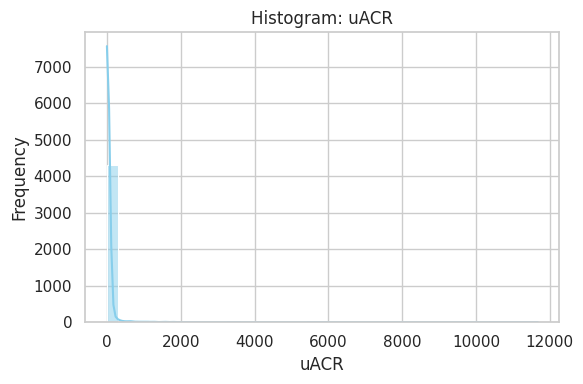

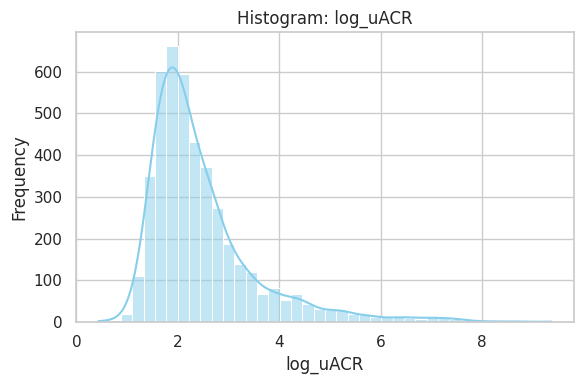

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Histogram of uACR and log_uACR
for var in ['uACR', 'log_uACR']:
    plt.figure(figsize=(6, 4))
    sns.histplot(cleaned[var], kde=True, bins=40, color='skyblue')
    plt.title(f"Histogram: {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


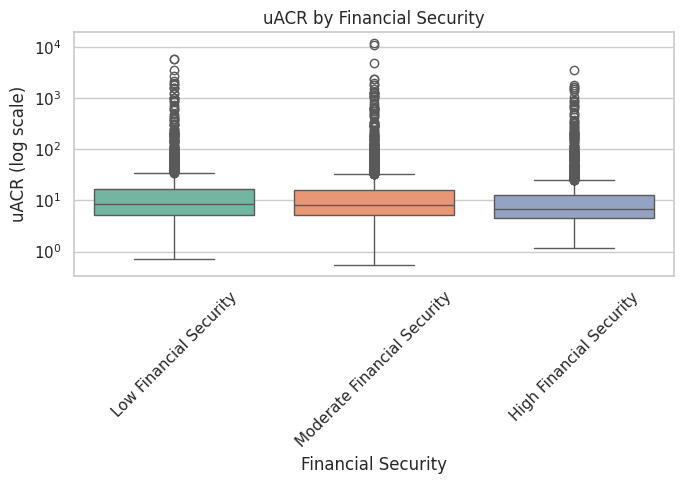

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=cleaned, x='FinancialSecurity', y='uACR',
            order=['Low Financial Security', 'Moderate Financial Security', 'High Financial Security'],
            palette="Set2")
plt.yscale('log')
plt.title("uACR by Financial Security")
plt.xlabel("Financial Security")
plt.ylabel("uACR (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


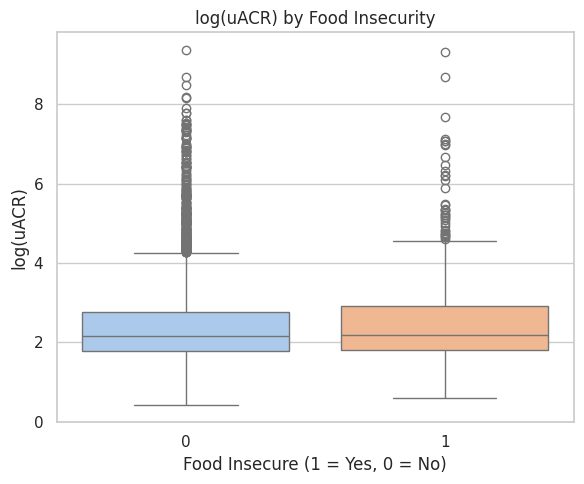

In [ ]:
#boxplot of log_uACR by food insecurity
plt.figure(figsize=(6, 5))
sns.boxplot(data=cleaned, x='FoodInsecure', y='log_uACR', palette="pastel")
plt.title("log(uACR) by Food Insecurity")
plt.xlabel("Food Insecure (1 = Yes, 0 = No)")
plt.ylabel("log(uACR)")
plt.tight_layout()
plt.show()


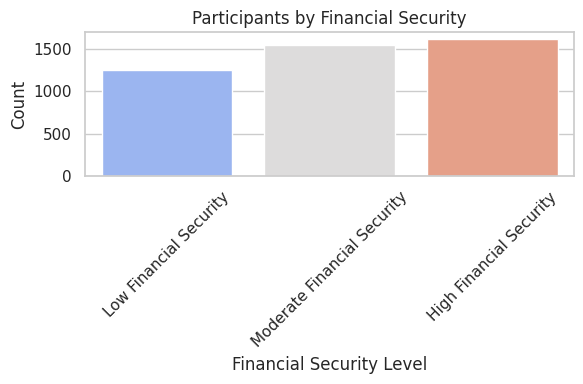

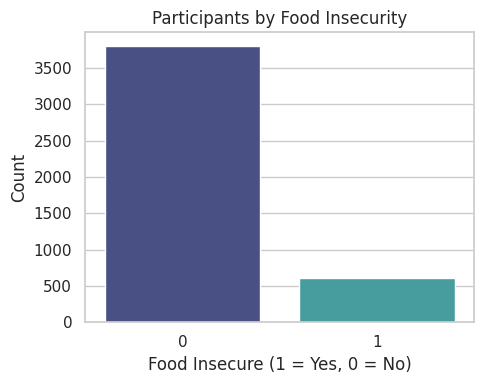

In [ ]:
#bar chart: distribution of financial secuirty and food insecurity
# Bar chart for Financial Security
plt.figure(figsize=(6, 4))
sns.countplot(data=cleaned, x='FinancialSecurity',
              order=['Low Financial Security', 'Moderate Financial Security', 'High Financial Security'],
              palette="coolwarm")
plt.title("Participants by Financial Security")
plt.xlabel("Financial Security Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for Food Insecurity
plt.figure(figsize=(5, 4))
sns.countplot(data=cleaned, x='FoodInsecure', palette="mako")
plt.title("Participants by Food Insecurity")
plt.xlabel("Food Insecure (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import kruskal

# Prepare groups
groups_fs = [
    cleaned.loc[cleaned['FinancialSecurity'] == level, 'uACR'].dropna()
    for level in ['Low Financial Security', 'Moderate Financial Security', 'High Financial Security']
]

# Run test
stat_fs, p_fs = kruskal(*groups_fs)
print(f"Kruskal-Wallis test for Financial Security groups:")
print(f"Statistic = {stat_fs:.3f}, p-value = {p_fs:.4f}")



Kruskal-Wallis test for Financial Security groups:
Statistic = 61.739, p-value = 0.0000


In [ ]:
from scipy.stats import mannwhitneyu

# Separate groups
group_food_insecure = cleaned.loc[cleaned['FoodInsecure'] == 1, 'uACR'].dropna()
group_food_secure = cleaned.loc[cleaned['FoodInsecure'] == 0, 'uACR'].dropna()

# Run test (two-sided)
stat_fi, p_fi = mannwhitneyu(group_food_insecure, group_food_secure, alternative='two-sided')
print(f"\nMann-Whitney U test for Food Insecurity:")
print(f"Statistic = {stat_fi:.3f}, p-value = {p_fi:.4f}")



Mann-Whitney U test for Food Insecurity:
Statistic = 1195331.000, p-value = 0.1255


In [ ]:
print(df_1718_clean[['uACR', 'RIDAGEYR', 'BMXBMI']].median())


uACR         7.72973
RIDAGEYR    52.00000
BMXBMI      28.60000
dtype: float64


In [ ]:
df_1718_clean['High_uACR'] = (df_1718_clean['uACR'] >= 30).astype(int)
ckd_pct = df_1718_clean['High_uACR'].mean() * 100
print(f"CKD prevalence based on uACR ≥ 30: {ckd_pct:.2f}%")


CKD prevalence based on uACR ≥ 30: 13.99%


In [ ]:
df_1718_clean['High_uACR'] = (df_1718_clean['uACR'] >= 30).astype(int)
high_uacr_pct = df_1718_clean['High_uACR'].mean() * 100
print(f"High uACR (≥30 mg/g): {high_uacr_pct:.2f}%")


High uACR (≥30 mg/g): 13.99%
